### LOAD libraries

In [1]:
import numpy as np
import pandas as pd
from shapely.geometry import *
from shapely.ops import *
from math import pow,sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn; #seaborn.set()
import ipywidgets as ipw
from scipy.stats import zscore
from scipy.special import comb
from scipy.integrate import quad
print("Lines of code for imports")

Lines of code for imports


### BASIC CONCEPTS

$\bf{\text{Population}}$: Is the universal set U of $\bf{N}$ elements sharing particular characteristics.
<br>$\bf{\text{Sample}}$: Is the subset x of size $\bf{n}$ that is part of the Population.
<br>$\bf{\text{Descriptive Statistics}}$: is when we use math to describe a population of data and its caracteristics.
<br>$\bf{\text{Inferential Statistics}}$: Is when math is used to make predictions about a population using sampling data.

$\bf{\text{Random variable}}$:Is a function that can take different sampling values.<br>
Random variables can be **discrete** if they can only take a limited quantity of values; for example  
the toss of a coin can be either "heads" or "tails". Or they can be **continous** if they can take infinite  
values like the length of an object.


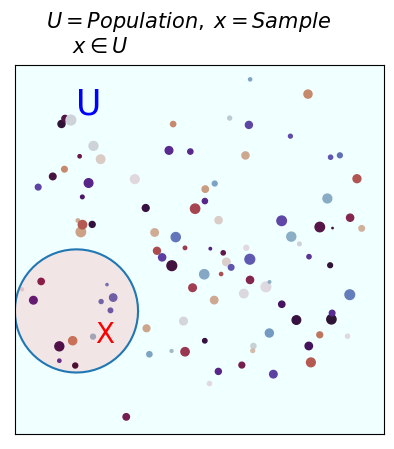

In [22]:
# draw random scattered dots
# a base for representing Venn diagrams
ax = plt.gca()
np.random.seed(42)

x = np.arange(0.5,5.5,.05)
y = np.arange(-2,2,.04)
x = np.random.choice(x, size=len(x)) + np.random.rand(len(x))
y = np.random.choice(y, size=len(y)) + np.random.rand(len(y))
# x = np.hstack([x for i in range(10)])
# y = np.hstack([np.full(10,y[i]) for i in range(10)])
x += np.random.rand(len(x))
y += np.random.rand(len(y))
ax.scatter(x,y,c=np.random.rand(len(x))+5,
           cmap='twilight_shifted',s=np.random.rand(len(x))*50,fc='b')

# Draw a shaded circle and Sets legends
circle = Point(2,0).buffer(distance=1)
x,y = circle.exterior.xy
ax.plot(x,y)
ax.fill(x,y,alpha=0.1,c='r',aa=True)
ax.text(2,3.2,"U",fontsize=25,c='b')
ax.text(2.3,-.5,"X",fontsize=20,c='r')
ax.text(1.5,4.2,'$U=Population,\;x=Sample$\n $\quad x\in U$',
        fontsize=15)

# Formating
ax.set_xlim(1,7)
ax.set_ylim(-2,4)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_facecolor('#f0ffff')
ax.set_aspect('equal')

    
#### mass distribution
The "raw Data" that is a collection of events, is usually repressented as the number of occurrences of each event vs the label or valule.
#### Probability distribution
is the function that shows the probability of occurrence of one or more events

The sum of all probabilityes must be equal to 1. 
In a discrete probability distribution it is the sum of all discrete probabilityes
$$ \sum_\limits{x=0}^{n} P(x)=1$$
In a continous probability distribution it is the area under the curve.
$$ \int_\limits{-\infty}^{+\infty} P(x)\partial x=1$$

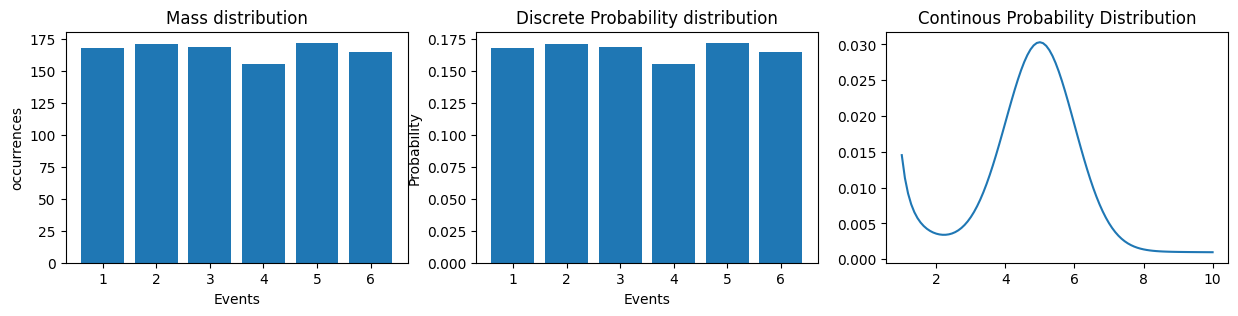

In [23]:
n=1000
values,counts = np.unique(np.random.randint(1,7,n),return_counts=True)

plt.subplots(1,3,figsize=(15,3))
plt.subplot(1,3,1)
plt.bar(values,counts)
plt.title("Mass distribution")
plt.xlabel("Events")
plt.ylabel("occurrences")

plt.subplot(1,3,2)
plt.bar(values,counts/n)
plt.title("Discrete Probability distribution")
plt.xlabel("Events")
plt.ylabel("Probability")

plt.subplot(1,3,3)
x=np.linspace(1,10,100)
y=1/(sqrt(2*np.pi))*np.exp(-0.5*np.power(x.copy()-5,2))+np.power(20,1/x.copy())/100#  
y=y/y.sum()
plt.plot(x, y)
plt.title("Continous Probability Distribution")
plt.show()

**Aritmetic mean** of a population of N elements is defined as:$$\quad\quad\quad\mu = \frac{\sum\limits_{i=1}^{N} x_i}{N}$$

**Geometric mean** is $$\quad\quad\quad\overline{\mu}=\sqrt[N]{\prod_{i=1}^N x_i}$$

**Variance** of a population $$\quad\quad\quad VAR=\sigma^2 = \frac{ \sum\limits_{i=1}^{n} (x_i-\mu)^2 }{n}\quad$$ 
**Standard deviation** is $$\quad\quad\quad\sigma = \sqrt[2]{VAR} = \sqrt[2]{\frac{ \sum\limits_{i=1}^{n} (x_i-\mu)^2 }{n}}$$

**Z-score** of a value indicates at how many standard deviations is the value separated from the mean $$Z(x)=\frac{x-\mu}{\sigma}$$


mean:  4.974784339546672
Variance:  0.9613697112841014
Standar dev:  0.9804946258313206
first 10 Zscores:  [-0.27008999 -0.34310934 -0.38976828  1.52638186 -0.34522112  0.07637647
 -0.03421646 -0.48934607  0.10680364  0.09236793]


mean:  4.974784339546672
Variance:  0.9613697112841014
Standar dev:  0.9804946258313206
first 10 Zscores:  [-0.27008999 -0.34310934 -0.38976828  1.52638186 -0.34522112  0.07637647
 -0.03421646 -0.48934607  0.10680364  0.09236793]


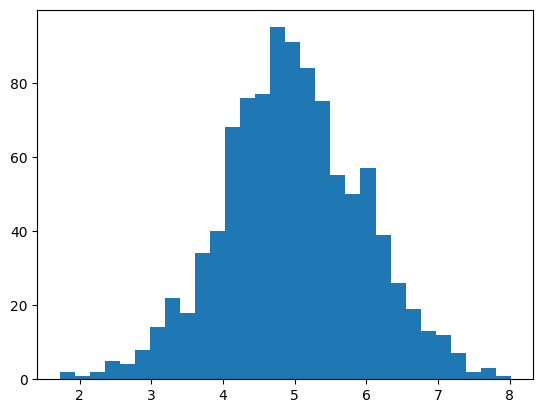

In [27]:
#As example lets use a randomly distributed set
dist = np.random.randn(1000)+5
plt.hist(dist,bins=30)

#using numpy
print("mean: ",dist.mean())
print("Variance: ",dist.var())
print("Standar dev: ",dist.std())
print("first 10 Zscores: ",zscore(dist)[:10])

#using definition
n=dist.size
mean = dist.sum()/n
print("\n\nmean: ",mean)
var = np.sum(np.power(dist-mean,2))/n
print("Variance: ",var)
print("Standar dev: ",np.sqrt(var))
print("first 10 Zscores: ",((dist-mean)/np.sqrt(var))[:10])

### UNIFORM DISTRIBUTION

Is a continuous distribution with a constant probability $\large{p}$ in an interval from $\large{a}$ to $\large{b}$.

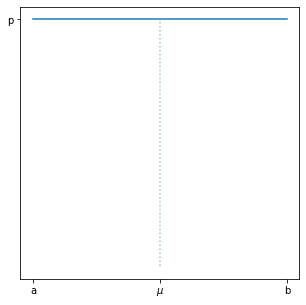

In [3]:
plt.figure(figsize=(5,5))
plt.plot([1,6],[1/7,1/7])
plt.plot([3.5,3.5],[0,1/7],':g',alpha=0.4)
plt.xticks([1,3.5,6],labels=['a','$\mu$','b'])
plt.yticks([1/7],labels=['p'])
plt.show()


\begin{equation*}
\int_\limits{-\infty}^{+\infty} P(x)\partial x=1\\
p(b-a)=1\\
\end{equation*} 
$$p=\frac{1}{b-a}$$

$$P(x) = \begin{cases}
                \large{\frac{1}{b-a}}; & a<x<b\\
                \quad0; & x<a \;\land\; x>b 
         \end{cases}$$

Mean and it's Standard deviation:
\begin{equation*}
\mu= a+\frac{\int_a^b xdx}{\int_a^bdx} = \left. a+\frac{\frac{1}{2}x^2}{x} \right|_a^b\\
\mu=a+\left. \frac{x}{2} \right|_a^b = a+\frac{b-a}{2}
\end{equation*}
$$\mu=\frac{a+b}{2}$$

$$\sigma=\frac{(b-a)^2}{12}$$


### BINOMIAL DISTRIBUTION

Is the ***discrete*** probability distribution in the case of an event with probability ***P %*** ocurring ***X*** times in groups of size ***n***. 
<br>

$$\quad\quad\quad P(x) = \left( \begin{array}{c} n \\ x \end{array} \right)\cdot p^x(1-p)^{n-x} \quad= \quad\frac{n!}{x!(n-x)!}\cdot p^x(1-p)^{n-x} $$

in the case of a coin toss the probability is $\frac{1}{2}$ the binomial distribution of HEADS <br> apearing a x times in a grup size n:
$$ \quad\quad\quad P(x) = \frac{n!}{x!(n-x)!}\cdot \left(\frac{1}{2}\right)^n $$
**Expected mean Value of samples** is the sum of the probability distribution times the frecuency of occurrences.<br>
It is the most probable value of a distribution and is mean of a  sample $\overline{x_n}$ and an estimate of the mean $\mu$ of the _population_
$$\quad\quad\quad E(x) = \sum_{x=0}^{n}f(x)\cdot P(x) = \overline{x_n}$$
For a givem P, which is known to be the probability of a phenomena in the population, and f(x)=x . The mean is:

\begin{equation*}
E(x) = \sum_{x=0}^{n}x\cdot \frac{n!}{x!(n-x)!}\cdot p^x(1-p)^{n-x}\\
\text{since} \;\;\; x!=x(x-1)!\,,\;\; p=p\cdot p^{x-1} \,and\;\;\; n!=n(n-1)!\\
E(x) = \sum_{x=0}^{n}\frac{\color{blue}\not\mathrel{x}\cdot \color{blue}n(n-1)!}{\color{blue}\not\mathrel{x}(x-1)!(n-x)!}\cdot \color{blue}p\cdot p^{x-1}(1-p)^{n-x}\\
E(x) = n\cdot p\sum_{x=0}^{n}\frac{ (n-1)!}{\color{blue}(x-1)!(n-x)!}\cdot p^{x-1}(1-p)^{n-x}\\
if \;\;\; a=n-1,\;\;\;b=x-1 \therefore n-k=a-b\\
E(x) = n\cdot p\sum_{x=0}^{n}\frac{ a!}{a!(a-b)!}\cdot p^a(1-p)^{a-b}\\
\text{ From equations (8) and (9)}:
\end{equation*}

$$E(x)=\overline{x_n}=n\cdot p$$
$$VAR=\sigma^2=np(1-p)$$
$$STD=\sigma=\sqrt{np(1-p)}$$


In [628]:
#What is the probability distribution of a event ocurrin x times in a group size n
# draw the discrete probability distribution if p=30% in 10 occurrences.

@ipw.interact( p=ipw.FloatSlider(min=0,max=1,step=0.05,value=.5, description='Probability'))
def draw_prob(p):
    n=20
    x = np.arange(n+1)
    prob = comb(np.full(n+1,n),x)*np.power(p,x)*np.power((1-p),n-x)
    plt.bar(x,prob)
    text = 'E(x) : {}\nProbability of  0 in 20: {}\nProbability of 20 of 20: {}'
    ex,a,b = p*n, round(prob[0],6), round(prob[19],6)
  
    print(text.format(ex,a,b))

interactive(children=(FloatSlider(value=0.5, description='Probability', max=1.0, step=0.05), Output()), _dom_c…

### POISON DISTRIBUTION

In the especial case in which the expected value $E(x)=\overline{x_n}\;\;$   is a rate _(events per interval)_ it is expressed as $\lambda=p\cdot n\therefore p=\frac{\lambda}{n}\; $ then the probability of **k** events ocurring is: (from equations (9) and (12))<br>
\begin{equation*}
\lim\limits_{n \to \infty}P(k)= \lim\limits_{n \to \infty} \frac{n!}{k!(n-x)!}\cdot \left( \frac{ \lambda }{n} \right)^k \left( 1- \frac{ \lambda}{n} \right)^{(n-k)} \\
n!=n(n-1)(n-2)\dots(n-k+1)(n-k)!,\;\;\;\to\;\;\lim\limits_{n \to \infty} \frac{\color{blue}{n(n-1)(n-2)\dots (n-k+1)}\color{red}{(n-k)!}}{\color{green}{k!}\color{red}{(n-x)!}}\cdot \frac{ \color{green}{(\lambda)^k} }{\color{blue}{n^k}} \left( 1- \frac{ \lambda}{n} \right)^{(n-k)} \\
\color{green}{\frac{(\lambda)^k}{k!}} \left[\lim\limits_{n \to \infty}\color{blue}{ \frac{n(n-1)(n-2)\dots (n-k+1)}{n^k}}\right] \left[ \lim\limits_{n \to \infty} \left( 1- \frac{ \lambda}{n}\right)^{n} \right]\left[\lim\limits_{n \to \infty} \left( 1- \frac{ \lambda}{n} \right)^{-k}\right]\\
{\frac{(\lambda)^k}{k!}} \left[\lim\limits_{n \to \infty}\left( 1+\frac{A_1}{n}+\frac{A_2}{n^2}\dots\frac{A_{k-1}}{n^{k-1}} \right) \right] \left[ \lim\limits_{n \to \infty} \left( 1+ \frac{ -\lambda}{n}\right)^{n} \right]\left[\lim\limits_{n \to \infty} \left( 1- \frac{ \lambda}{n} \right)^{-k}\right]\\
{\frac{(\lambda)^k}{k!}} \bigg[ 1+0+0\dots0 \bigg] \bigg[ e^{-\lambda} \bigg]\left[\lim\limits_{n \to \infty} \left( \frac{n}{n-\lambda} \right)^{k}\right]\\
\end{equation*}
$$P(k)=\frac{(\lambda)^k}{k!}e^{-\lambda}$$
$$VAR=\sigma^2=\lambda$$
$$STD=\sigma=\sqrt{\lambda}$$


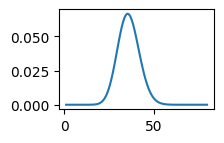

In [652]:
'''draw a poisson distribution for receptions in a hotel
if the rate of reception per day = 36'''
import scipy.special
mpl.rc_file_defaults()
plt.figure(figsize=(2,1.3))
x=np.linspace(1,80,100)
y=(np.power(36,x)/scipy.special.factorial(x))*np.exp(-36)
plt.plot(x,y); plt.show();

In [627]:
#is the area under the normal prob dist from 110/50 to infinity
def sigma_from_confidence(conf):
    def normal_dist(x):
        return 1/(np.sqrt(2*np.pi))*np.exp(-0.5*np.power(x,2))
    sigma=np.hstack([np.linspace(0,1.5,500), np.linspace(1.505,3.5,400)])
    
    #half the area from 0 = the integral under curve
    area = map(lambda x:quad(normal_dist,0,x)[0] ,sigma) 
    area = 2*np.round(np.array(list(area)),5)
    return sigma[area<conf][-1]
    

sigma_from_confidence(.99)

2.575

In [629]:
2.575*0.031311

0.080625825

### NORMAL DISTRIBUTION or GAUSS DISTRIBUTION



is a continous distribution with the Probability density function:
$$ P(x|\mu, \sigma) = \frac{1} { \sqrt{2\pi} \cdot \sigma }e^{- \frac{1}{2} \Big( \frac{x-\mu}{\sigma} \Big)^2} $$
From equation (5) of z-scores:
\begin{equation*}
Z(x)=\frac{x-\mu}{\sigma} \therefore e^{- \frac{1}{2} \Big( \frac{x-\mu}{\sigma} \Big)^2}=\frac{1}{\sqrt{e^{(z_x)^2}}}
\end{equation*}
$$P(x|\mu, \sigma) =\frac{1}{\sigma\sqrt{2\pi e^{(z_x)^2}}}$$

A distribution is **STANDARD NORMAL DISTRIBUTION** if σ=1, and μ=0 thus:
$$(11)\quad\quad\quad P(x) = \frac{1} { \sqrt{2\pi} }e^{- \frac{x^2}{2} }$$

#### THE EMPITICAL RULE

The probability of occurrence of a phenomena within standard deviations are as follows:
$$ 1\sigma=68.2\%,\;\; 2\sigma=95.4\%,\;\; 3\sigma=99.7\%$$


In [7]:

@ipw.interact(mu=ipw.FloatSlider(min=4,max=7,step=0.5,value=5, description='Mean'),
             sigma=ipw.FloatSlider(min=0.7,max=2,step=0.1,value=1, description='std-Dev'))
def plot_std_dev(mu,sigma):
    plt.figure(figsize=(15,5))
    x=np.linspace(-2,13,1000)
    p=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*np.power((x-mu)/sigma,2))
    
    quartiles = (x[x<=(mu-3*sigma)][-1],x[x<=(mu-2*sigma)][-1],x[x<=(mu-sigma)][-1],
                x[x>=(mu+sigma)][0],x[x>=(mu+2*sigma)][0],x[x>=(mu+3*sigma)][0])
    plt.plot([mu,mu],[0,p.max()],':b')
    plt.xticks(ticks=np.hstack([quartiles[:3],[mu],quartiles[3:]]),
                                labels=['-3σ\n0.1%','-2σ\n2.3%','-σ\n15.9%','μ\n50%',
                                        '+σ\n84.1%', '+2σ\n97.7', '+3σ\n99.9'],size=11)#, angle=60 )
    
    plt.ylim([0,0.62])
    plt.plot(x,p)

interactive(children=(FloatSlider(value=5.0, description='Mean', max=7.0, min=4.0, step=0.5), FloatSlider(valu…

#### PROBABILITY DENSITY FUNCTION (PDF)


Is a ***continous*** function of the probability of an event that can take infinite values ( like the length of a human hair ) in a determined range of values and is the representation of a **&*continous probability distribution***. the values of that function can take values >1 since the values of a point in the function DO NOT represent the probability, unlike in the binomial distribution.

The probability of an event to occurr in a guiven range of values in a continous probability distribution is the area under the curve of it's probability density function

$$ (13)  \quad\quad\quad P[a<x<b]=\int_{a}^{b} PDF(x)\partial x$$

$$ (12) \quad\quad\quad P[-\infty<x<\infty]=\int_{-\infty}^{\infty} PDF(x)\partial x=1 $$

An example of a continous distribution function is the normal distribution



#### CUMULATIVE DISTRIBUTION FUNCTION (CDF)

for a discrete probability distribution.
$$ CDF(x) = \sum_{i=-\infty}^{x} P(i) $$

for a probability density function.
$$ CDF(x) = \int_{-\infty}^{x} P(x)\partial x $$

$$ P(a<x\leq b)=CDF(b)-CDF(a)$$


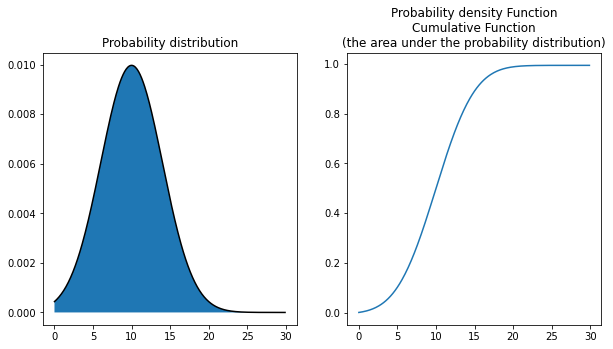

0.994

In [4]:
from math import pi
σ=4
μ=10

x=np.arange(300)/10
prob=(1/(sqrt(2*pi)*σ))*(np.exp(-0.5*np.power((x-μ)/σ,2)))/10
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
plt.fill_between(x,prob)
plt.plot(x,prob,color='k',linewidth=1.5)
plt.title("Probability distribution")

plt.subplot(1,2,2)
cumul=np.array([np.sum(prob[i::-1]) for i in range(prob.size)])
plt.title("Probability density Function\nCumulative Function\n(the area under the probability distribution)")
plt.plot(x,cumul)
plt.show()
round(np.sum(prob),3)


In [305]:
prob[2::-1]

array([0.00495934, 0.00466324, 0.00438208])

For a=12,b=20 --> P(a,b) =  0.3492  =  CDF(20)-CDF(12) = 0.3492


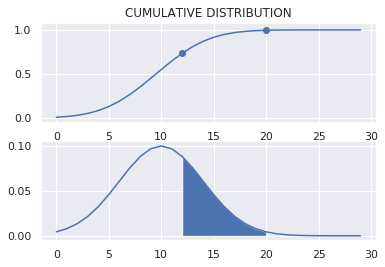

In [10]:
#for the exammple of the normal distribution below-->(5) from
CDF=np.cumsum(prob)
print("For a=12,b=20 --> P(a,b) = ",round(np.sum(prob[12:21]),4)," =  CDF(20)-CDF(12) =", round(CDF[20]-CDF[11],4))
plt.subplot(2,1,1)
plt.title("CUMULATIVE DISTRIBUTION")
plt.plot(x,CDF)
plt.scatter( [x[12],x[20]], [CDF[12],CDF[20]])
plt.subplot(2,1,2)
plt.plot(x,prob)
plt.fill_between(x[12:21],prob[12:21])
plt.show()

###   BERNOULLI DISTRIBUTION



Is a special case of the binomial distribution in which there is random variable ***X*** with two possible
boolean outcomes: 1=True,yes,Favorable,accepted... with probability ***p*** or  0=False,no,unfavorable,
rejected.... with probability ***(1-p)*** 

the probability mass function is guiven by:

$$ f(x|p)= \begin{cases} p & \quad \text{ if } x=1 \\ 1-p & \quad \text{ if } x=0 \end{cases} $$
also can be rfepresented as:$$ f(x|p)=p^x(1-p)^{1-x} \quad \text{ for } x\in \{0,1\}$$


Mean and variance:
\begin{equation*}
\text{from equation (12)}:\;\; \mu=(1-p)0+p(1)
\end{equation*}
$$\mu=p$$
$$\sigma^2=p(1-p)$$<br>
$$mode=median=\begin{cases} 0 & \text{ if } & p<\frac{1}{2}\\ 0,1 & \text{ if } & p= \frac{1}{2}\\
1 & \text{if} & p>\frac{1}{2} \end{cases}$$



### SAMPLING.

#### Strattiffied sampling
when a population is represented by different groups $x_1,x_2,\dots,x_k$ with frecuencies $p_1,p_2,\dots,p_k$ of then a randomized sample size $\large{n}$ must be representative of the population and must deliberately appear in quantities $np_1,np_2,\dots,np_n$


#### Mean and variance of a Sample size n:
The mean for a sample group of size **n** from a population size **N** is:
$$\overline{x}=\frac{\sum\limits_{i=1}^{n} (x_i)}{n}$$<br>
The variance of the elemnts in the sample group, knowing the mean **$\mu$** of the population is given by:
$$ VAR_n=s^2=\frac{\sum\limits_{i=1}^{n}(x_i-\mu)^2}{n}$$

#### Law of Large Numbers (LLN)
The mean of a sample tends towards the mean of the population when the sample size gets larger
$$\quad\quad \lim_\limits{n \to \infty} \overline{x}=\mu$$



#### Mean distribution of samples

Is the probability distribution of the $\mathbf{n}$ means **$\overline{ \mathbf{x_i}}$** and with a MEAN OF THE MEANS
$\large{\mathbf{ \mu_{\overline{x}}}}$ :

$$\mu_\overline{x}=\frac{\sum_\limits{i=1}^{n} \overline{x}_i}{n}$$

#### Central linit theorem (CLT)

As the number of samples increases, the distribution of the mean of those samples aproaches a normal distribution and the mean of that distribution ( the mean of the mean of the samples ) aproaches the mean of the population.

$$\lim_\limits{n \to \infty} \mu_\overline{x} \to \mu$$

#### Estimating the variance of a sample:
If *$\mu$* is unknown the variance of the population can be estimated using the variance of the samples $\overline{\textbf{x}}$ but istead of dividing by n one degree of freedom less is optimal : n-1
$$VAR=s^2=\frac{\sum\limits_{i=1}^{n}(x_i-\overline{x})^2}{n-1}$$


#### Standar Error of the means distribution
For any given population with variance **$σ^2$** ; the variance of the mean distribution of n samples size x from the population,is guiven by:

$${\large\sigma\small}_{\overline{x}}^2\approx\frac{\sigma^2}n$$

and the standard deviation of the sample mean is known as the Standard error of the sample mean distribution:

$$\mathcal{\large\sigma\small}_{\small\overline{x}}\approx\frac{\sigma}{\sqrt{n}}$$

For the Bernoully distribution

$${\large\sigma\small}_\overline{x} \approx\sqrt{\frac{np(1-p)}{n-1}}$$

#### Using Z-scores from Standard distribution to estimate P-Values

With the z-score from a value we can calculate the corresponding p-values in a normal distribution z-table

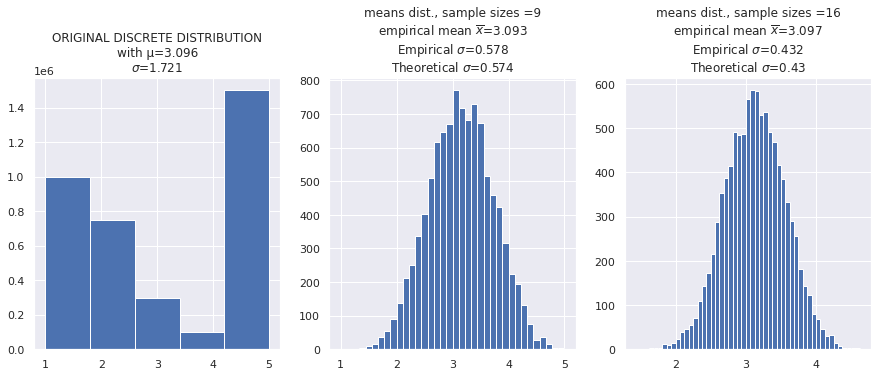

In [637]:
# EXERCISE: LAW OF CENTRAL LIMIT THEOREM & ESTIMATION OF THE COVARIANCE WITH TWO DIFFERENT SAMPLE SIZES
# there are 5 tipes of phenomena 1,2,3,4 and 5 and the population is 365000

dist = np.hstack([np.full(1000000,1),np.full(750000,2),np.full(300000,3),np.full(100000,4),np.full(1500000,5)])
random_index = np.random.permutation(np.arange(3650000))
dist = dist[random_index]
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(dist,bins=5)
title0 = 'ORIGINAL DISCRETE DISTRIBUTION\nwith μ={}'.format(round(dist.mean(),3))
title1 = '\n$\sigma$={}'.format(round(dist.std(),3))
plt.title(title0 + title1)

def sample_n(n):
    s=np.zeros(10000)
    for i in range(10000):
        s[i] = np.random.choice(dist,n).mean()
    sample_means = s
    ax=plt.gca()
    ax.hist(sample_means,bins=np.unique(sample_means))
    title0 = 'means dist., sample sizes ={}'.format(n) + '\nempirical mean $\overline{x}$'
    title1 = '={}'.format(round(sample_means.mean(),3))
    title2 = '\nEmpirical $\sigma$={}'.format(round(sample_means.std(),3))
    title3 = '\nTheoretical $\sigma$={}'.format(round(dist.std()/np.sqrt(n),3))
    ax.set_title(title0 + title1 + title2 + title3)

#taking 10000 random samples size 9 sample_mean = μ/3 = 0.574
plt.subplot(1,3,2)
sample_n(9)

#taking 10000 random samples size 16 samples_mean = μ/4 = 0.43
plt.subplot(1,3,3)
sample_n(16)

$$P(-\mu_{\overline{x}}\leq x \leq +\mu_{\overline{x}})\leq5\%$$

##### Estimating the mean of a mass distribution using sampling CI=95%

In 10,000 trials this prediction was right 99.84% of the time predicting 𝜇


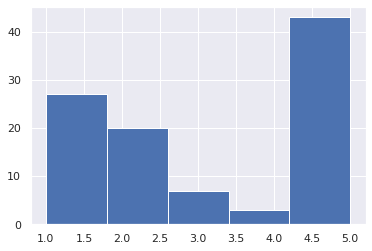

In [634]:
#np.random.seed(42)

plt.hist(sample100,bins=5)
mean   = dist.mean()
#from the law of large numbers
counts = np.zeros(10000)

for i in range(10000):
    sample100 = np.random.choice(dist,100)
    sample_mean = sample100.mean()         #Step 3
    pop_std = np.power(sample100-sample_mean,2).sum()/(sample100.size-1)  #Step 4
    std_err = pop_std/(sqrt(100))          #step 5
    minim   = sample_mean-2*std_err 
    maxim   = sample_mean+2*std_err
    if minim <= mean and maxim >= mean:    #Step 6
        counts[i]=True
    else:
        counts[i]=False
    #interval    = "With a confidence of 95% the confidence interval is from {} to {}\nReal population mean: {}"
    #print(interval.format(round(minim,3),round(maxim,3),round(dist.mean(),3)))
percentage =   str(round(np.count_nonzero(counts)/10000*100,2)) 
print("In 10,000 trials this prediction was right " +percentage +"% of the time predicting 𝜇")

In [4]:
hash(str(pd.DataFrame({'a':[1,2,3],'b':[1,5,6]})))

3982782059108743949

##### Estimating the mean of  with a bernoulli distribution using samples CI=95%


In [488]:

#generats prefferences of population with candidate 1 as favorite
#np.random.seed(4002)
poblacion = np.hstack([np.random.randint(0,2,300000),
                     np.full(200000,1), np.full(100000,0)]) 

#randomize the population
poblacion = np.random.permutation(poblacion)
index     = np.random.permutation(range(600000))
poblacion = poblacion[index]
pop_mean  = np.nonzero(poblacion)[0].size/600000
k=1000
counts = np.zeros(k)
print_one=1
for i in range(k):
    n = 100 #number of samples
    encuesta  = np.random.choice(poblacion,n) #initialize samples
    p = np.nonzero(encuesta)[0].size/n # which is the mean.
    pop_var   = p*(1-p)*n/(n-1) #estimating 
    pop_std   = sqrt(pop_var)
    std_err   = pop_std/sqrt(n)
    if print_one:
        print("margin of error = {}% of the mean".format(round(std_err/p*100,2)))
        print_one=0
        #print(p,pop_var,pop_std,std_err)
    counts[i] = pop_mean < p+2*std_err and pop_mean > p-2*std_err
print("Right {}%".format(round(counts.nonzero()[0].size/k,3)*100)+" of the time predicting 𝜇 in 1000 trials")

margin of error = 8.91% of the mean
Right 95.7% of the time predicting 𝜇 in 1000 trials


##### Estimatinga several means in a mass distribution CI=95%

In [484]:

means = np.unique(dist,return_counts=True)[1]/3650000
k=1000
counts = np.zeros(k)
for i in range(k):
    n = 100 #number of samples
    encuesta  = np.random.choice(dist,n) #initialize samples
#     p = np.nonzero(encuesta)[0].size/n # which is the mean.
#     pop_var   = p*(1-p)*n/(n-1) #estimating 
#     pop_std   = sqrt(pop_var)
#     std_err   = pop_std/sqrt(n)
#     #print(p,pop_var,pop_std,std_err)
#     counts[i] = pop_mean < p+2*std_err and pop_mean > p-2*std_err
# print("Right {}%".format(round(counts.nonzero()[0].size/k,3)*100)+" of the time predicting 𝜇 in 1000 trials")

#### PROBABILITY DENSITY FUNCTION (PDF)


Is a ***continous*** function of the probability of an event that can take infinite values ( like the length of a human hair ) in a determined range of values and is the representation of a **&*continous probability distribution***. the values of that function can take values >1 since the values of a point in the function DO NOT represent the probability, unlike in the binomial distribution.

The probability of an event to occurr in a guiven range of values in a continous probability distribution is the area under the curve of it's probability density function

$$ (13)  \quad\quad\quad P[a<x<b]=\int_{a}^{b} PDF(x)\partial x$$

$$ (12) \quad\quad\quad P[-\infty<x<\infty]=\int_{-\infty}^{\infty} PDF(x)\partial x=1 $$

An example of a continous distribution function is the normal distribution



#### CUMULATIVE DISTRIBUTION FUNCTION (CDF)

for a discrete probability distribution.
$$ CDF(x) = \sum_{i=-\infty}^{x} P(i) $$

for a probability density function.
$$ CDF(x) = \int_{-\infty}^{x} P(x)\partial x $$

$$ P(a<x\leq b)=CDF(b)-CDF(a)$$


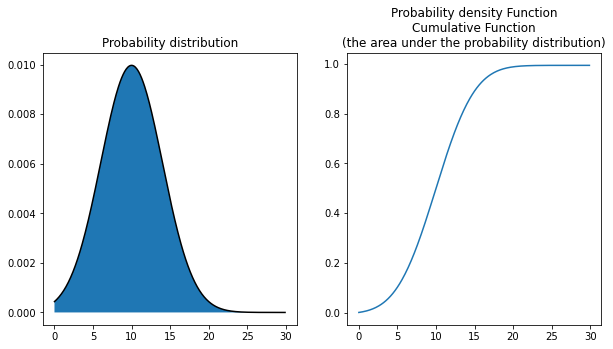

0.994

In [4]:
from math import pi
σ=4
μ=10

x=np.arange(300)/10
prob=(1/(sqrt(2*pi)*σ))*(np.exp(-0.5*np.power((x-μ)/σ,2)))/10
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
plt.fill_between(x,prob)
plt.plot(x,prob,color='k',linewidth=1.5)
plt.title("Probability distribution")

plt.subplot(1,2,2)
cumul=np.array([np.sum(prob[i::-1]) for i in range(prob.size)])
plt.title("Probability density Function\nCumulative Function\n(the area under the probability distribution)")
plt.plot(x,cumul)
plt.show()
round(np.sum(prob),3)


In [305]:
prob[2::-1]

array([0.00495934, 0.00466324, 0.00438208])

### SAMPLING.

#### Strattiffied sampling
when a population is represented by different groups $x_1,x_2,\dots,x_k$ with frecuencies $p_1,p_2,\dots,p_k$ of then a randomized sample size $\large{n}$ must be representative of the population and must deliberately appear in quantities $np_1,np_2,\dots,np_n$


#### Mean and variance of a Sample size n:
The mean for a sample group of size **n** from a population size **N** is:
$$\overline{x}=\frac{\sum\limits_{i=1}^{n} (x_i)}{n}$$<br>
The variance of the elemnts in the sample group, knowing the mean **$\mu$** of the population is given by:
$$ VAR_n=s^2=\frac{\sum\limits_{i=1}^{n}(x_i-\mu)^2}{n}$$

#### Law of Large Numbers (LLN)
The mean of a sample tends towards the mean of the population when the sample size gets larger
$$\quad\quad \lim_\limits{n \to \infty} \overline{x}=\mu$$



#### Mean distribution of samples

Is the probability distribution of the $\mathbf{n}$ means **$\overline{ \mathbf{x_i}}$** and with a MEAN OF THE MEANS
$\large{\mathbf{ \mu_{\overline{x}}}}$ :

$$\mu_\overline{x}=\frac{\sum_\limits{i=1}^{n} \overline{x}_i}{n}$$

#### Central linit theorem (CLT)

As the number of samples increases, the distribution of the mean of those samples aproaches a normal distribution and the mean of that distribution ( the mean of the mean of the samples ) aproaches the mean of the population.

$$\lim_\limits{n \to \infty} \mu_\overline{x} \to \mu$$

#### Estimating the variance of a sample:
If *$\mu$* is unknown the variance of the population can be estimated using the variance of the samples $\overline{\textbf{x}}$ but istead of dividing by n one degree of freedom less is optimal : n-1
$$VAR=s^2=\frac{\sum\limits_{i=1}^{n}(x_i-\overline{x})^2}{n-1}$$


#### Standar Error of the means distribution
For any given population with variance **$σ^2$** ; the variance of the mean distribution of n samples size x from the population,is guiven by:

$${\large\sigma\small}_{\overline{x}}^2\approx\frac{\sigma^2}n$$

and the standard deviation of the sample mean is known as the Standard error of the sample mean distribution:

$$\mathcal{\large\sigma\small}_{\small\overline{x}}\approx\frac{\sigma}{\sqrt{n}}$$

For the Bernoully distribution

$${\large\sigma\small}_\overline{x} \approx\sqrt{\frac{np(1-p)}{n-1}}$$

#### Using Z-scores from Standard distribution to estimate P-Values

With the z-score from a value we can calculate the corresponding p-values in a normal distribution z-table

#### Margin of Error
The probability of the mean of the samples means mean $\mu_{\overline{x_n}}$ being within two standard deviations from the population mean $\mu$.is the same as the probability of the population mean being at two standard deiations from the sample means mean:

\begin{equation*}
^*{\mathtt{\text{95% is the usual covention of acceptance of confidence}}}\\
\displaystyle{P(\;\mu_{\overline{x}} \in (\;\mu\pm 2\sigma_{\overline{x}}\;)\;)=P(\;\mu \in (\;\mu_{\overline{x}}\pm 2\sigma_{\overline{x}}\;)\;)}=95\%^{*}
\end{equation*}





#### Sampling Process
It consists of 5 basic steps:

• Select the sample size <b>n</b> of your sample (if not given ).<br>
• Select your samples such as tey represent each group proportionally i.e. if pooling people: the correct proportion<br>
   $\quad$of womomen and men, or young and old or by ethnicity...whichever is more relevant.<br>
• Calculate the sample mean $\mathbf{\overline{x}}$<br>
• Estimate the population Standard deviation $\mathbf{\sigma}$ <br>
• Estimate the standard Error $\mathbf{\sigma_\overline{x}}$.<br>
• Calculate your confidence interval<br>


A sample size of $n\geq30$ can be used for estimations using the standart deviation distribution aproximation bun for $n\;\leq\;30$ a $\texttt{ t-distribution}$ is required

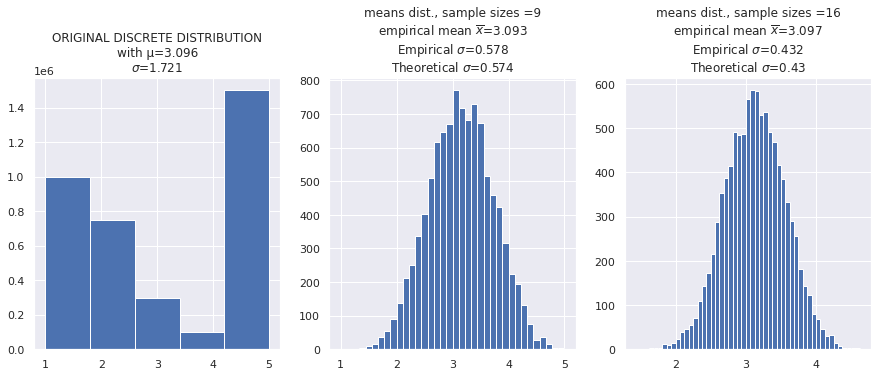

In [637]:
# EXERCISE: LAW OF CENTRAL LIMIT THEOREM & ESTIMATION OF THE COVARIANCE WITH TWO DIFFERENT SAMPLE SIZES
# there are 5 tipes of phenomena 1,2,3,4 and 5 and the population is 365000

dist = np.hstack([np.full(1000000,1),np.full(750000,2),np.full(300000,3),np.full(100000,4),np.full(1500000,5)])
random_index = np.random.permutation(np.arange(3650000))
dist = dist[random_index]
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(dist,bins=5)
title0 = 'ORIGINAL DISCRETE DISTRIBUTION\nwith μ={}'.format(round(dist.mean(),3))
title1 = '\n$\sigma$={}'.format(round(dist.std(),3))
plt.title(title0 + title1)

def sample_n(n):
    s=np.zeros(10000)
    for i in range(10000):
        s[i] = np.random.choice(dist,n).mean()
    sample_means = s
    ax=plt.gca()
    ax.hist(sample_means,bins=np.unique(sample_means))
    title0 = 'means dist., sample sizes ={}'.format(n) + '\nempirical mean $\overline{x}$'
    title1 = '={}'.format(round(sample_means.mean(),3))
    title2 = '\nEmpirical $\sigma$={}'.format(round(sample_means.std(),3))
    title3 = '\nTheoretical $\sigma$={}'.format(round(dist.std()/np.sqrt(n),3))
    ax.set_title(title0 + title1 + title2 + title3)

#taking 10000 random samples size 9 sample_mean = μ/3 = 0.574
plt.subplot(1,3,2)
sample_n(9)

#taking 10000 random samples size 16 samples_mean = μ/4 = 0.43
plt.subplot(1,3,3)
sample_n(16)

$$P(-\mu_{\overline{x}}\leq x \leq +\mu_{\overline{x}})\leq5\%$$

#### Margin of Error
The probability of the mean of the samples means mean $\mu_{\overline{x_n}}$ being within two standard deviations from the population mean $\mu$.is the same as the probability of the population mean being at two standard deiations from the sample means mean:

\begin{equation*}
^*{\mathtt{\text{95% is the usual covention of acceptance of confidence}}}\\
\displaystyle{P(\;\mu_{\overline{x}} \in (\;\mu\pm 2\sigma_{\overline{x}}\;)\;)=P(\;\mu \in (\;\mu_{\overline{x}}\pm 2\sigma_{\overline{x}}\;)\;)}=95\%^{*}
\end{equation*}





#### Sampling Process
It consists of 5 basic steps:

• Select the sample size <b>n</b> of your sample (if not given ).<br>
• Select your samples such as tey represent each group proportionally i.e. if pooling people: the correct proportion<br>
   $\quad$of womomen and men, or young and old or by ethnicity...whichever is more relevant.<br>
• Calculate the sample mean $\mathbf{\overline{x}}$<br>
• Estimate the population Standard deviation $\mathbf{\sigma}$ <br>
• Estimate the standard Error $\mathbf{\sigma_\overline{x}}$.<br>
• Calculate your confidence interval<br>


A sample size of $n\geq30$ can be used for estimations using the standart deviation distribution aproximation bun for $n\;\leq\;30$ a $\texttt{ t-distribution}$ is required

##### Estimating the mean of a mass distribution using sampling CI=95%

In 10,000 trials this prediction was right 99.84% of the time predicting 𝜇


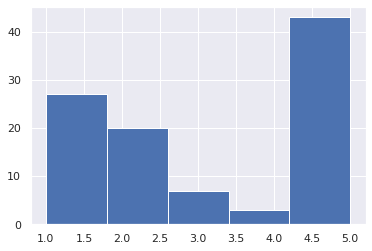

In [634]:
#np.random.seed(42)

plt.hist(sample100,bins=5)
mean   = dist.mean()
#from the law of large numbers
counts = np.zeros(10000)

for i in range(10000):
    sample100 = np.random.choice(dist,100)
    sample_mean = sample100.mean()         #Step 3
    pop_std = np.power(sample100-sample_mean,2).sum()/(sample100.size-1)  #Step 4
    std_err = pop_std/(sqrt(100))          #step 5
    minim   = sample_mean-2*std_err 
    maxim   = sample_mean+2*std_err
    if minim <= mean and maxim >= mean:    #Step 6
        counts[i]=True
    else:
        counts[i]=False
    #interval    = "With a confidence of 95% the confidence interval is from {} to {}\nReal population mean: {}"
    #print(interval.format(round(minim,3),round(maxim,3),round(dist.mean(),3)))
percentage =   str(round(np.count_nonzero(counts)/10000*100,2)) 
print("In 10,000 trials this prediction was right " +percentage +"% of the time predicting 𝜇")

In [4]:
hash(str(pd.DataFrame({'a':[1,2,3],'b':[1,5,6]})))

3982782059108743949

##### Estimating the mean of  with a bernoulli distribution using samples CI=95%


In [488]:

#generats prefferences of population with candidate 1 as favorite
#np.random.seed(4002)
poblacion = np.hstack([np.random.randint(0,2,300000),
                     np.full(200000,1), np.full(100000,0)]) 

#randomize the population
poblacion = np.random.permutation(poblacion)
index     = np.random.permutation(range(600000))
poblacion = poblacion[index]
pop_mean  = np.nonzero(poblacion)[0].size/600000
k=1000
counts = np.zeros(k)
print_one=1
for i in range(k):
    n = 100 #number of samples
    encuesta  = np.random.choice(poblacion,n) #initialize samples
    p = np.nonzero(encuesta)[0].size/n # which is the mean.
    pop_var   = p*(1-p)*n/(n-1) #estimating 
    pop_std   = sqrt(pop_var)
    std_err   = pop_std/sqrt(n)
    if print_one:
        print("margin of error = {}% of the mean".format(round(std_err/p*100,2)))
        print_one=0
        #print(p,pop_var,pop_std,std_err)
    counts[i] = pop_mean < p+2*std_err and pop_mean > p-2*std_err
print("Right {}%".format(round(counts.nonzero()[0].size/k,3)*100)+" of the time predicting 𝜇 in 1000 trials")

margin of error = 8.91% of the mean
Right 95.7% of the time predicting 𝜇 in 1000 trials


##### Estimatinga several means in a mass distribution CI=95%

In [484]:

means = np.unique(dist,return_counts=True)[1]/3650000
k=1000
counts = np.zeros(k)
for i in range(k):
    n = 100 #number of samples
    encuesta  = np.random.choice(dist,n) #initialize samples
#     p = np.nonzero(encuesta)[0].size/n # which is the mean.
#     pop_var   = p*(1-p)*n/(n-1) #estimating 
#     pop_std   = sqrt(pop_var)
#     std_err   = pop_std/sqrt(n)
#     #print(p,pop_var,pop_std,std_err)
#     counts[i] = pop_mean < p+2*std_err and pop_mean > p-2*std_err
# print("Right {}%".format(round(counts.nonzero()[0].size/k,3)*100)+" of the time predicting 𝜇 in 1000 trials")